In [1]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline
%config Compeleter.use_jedi = False
%config Completer.use_jedi = False

In [2]:
df = pd.read_csv('1995_96 - 2020 Premier league standings.csv')
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996


In [3]:
df['GD'] = df['GF'] - df['GA']
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year,GD
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996,38
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996,29
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996,36
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996,17
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996,17


### we want to create a linear model to show relation between goal differences and rank
### we will use rank colomn as 'y' and goal difference as 'X' features

In [4]:
y = df['Rk']
y.shape

(500,)

In [5]:
X = df['GD'].values.reshape(-1,1)
X.shape

(500, 1)

In [6]:
# fit linear regression model and calculate accuracy, intecept and slope using Goals difference

model = LinearRegression().fit(X,y)
r_sq = model.score(X,y)
y_preds = model.predict(X)

slope = model.coef_
intercept = model.intercept_

In [7]:
print (f'model accuracy = {r_sq}')

model accuracy = 0.8384102509297338


In [8]:
preds = intercept + slope * X

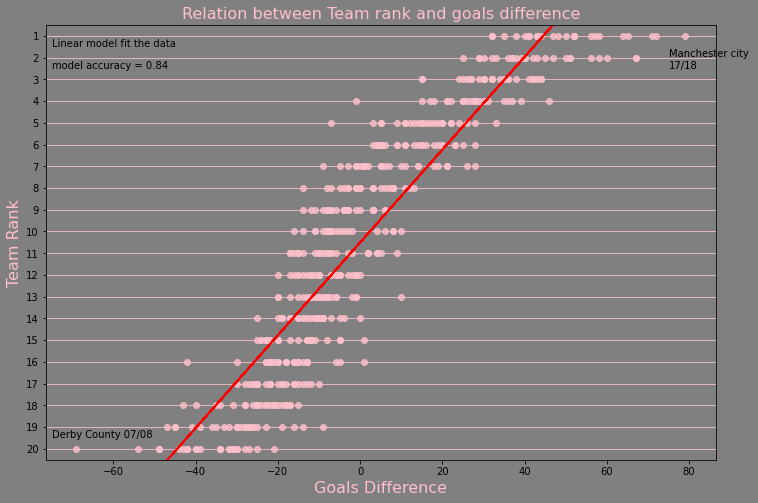

In [9]:
# prepare plot figure

fig, ax = plt.subplots (figsize = (12, 8))
fig.set_facecolor('grey')
ax.patch.set_facecolor ('gray')

# plot data
plt.scatter(X,y, alpha = 0.8, color = 'pink')
plt.plot(X,y_preds, color = 'red')

# horizontal grid
plt.grid(axis = 'y', color = 'pink' )

# prepare and invert y-axis 
plt.yticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.ylim(0.5,20.5)
plt.gca().invert_yaxis()

# axis and plot titles
plt.xlabel('Goals Difference', fontsize = 16, color = 'pink')
plt.ylabel('Team Rank', fontsize = 16, color = 'pink')
plt.title('Relation between Team rank and goals difference', fontsize = 16, color = 'pink')

# some annotations

ax.annotate(text = f'Manchester city \n17/18', xy  = (75, 2.5))
ax.annotate(text = 'Derby County 07/08', xy  = (-75, 19.5))
ax.annotate(text = 'Linear model fit the data', xy  = (-75, 1.5))
ax.annotate(text = f'model accuracy = {round(r_sq,2)}', xy  = (-75, 2.5))
plt.savefig('Team rank prediction using goal difference.jpeg');

In [10]:
df.sort_values(by ='GD', ascending = False).tail(15)

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year,GD
298,19,Hull City,38,6,12,20,34,75,30,24390,Stephen Hunt - 6,Boaz Myhill,2010,-41
295,16,Wigan Athletic,38,9,9,20,37,79,36,18006,Hugo Rodallega - 10,Chris Kirkland,2010,-42
99,20,Watford,38,6,6,26,35,77,24,19431,Heiðar Helguson - 6,Alec Chamberlain,2000,-42
379,20,Cardiff City,38,7,9,22,32,74,30,27430,Jordon Mutch - 7,David Marshall,2014,-42
339,20,Wolves,38,5,10,23,40,82,25,25677,Steven Fletcher - 12,Wayne Hennessey,2012,-42
437,18,Hull City,38,9,7,22,37,80,34,20761,Robert Snodgrass - 7,Eldin Jakupović,2017,-43
219,20,Sunderland,38,3,6,29,26,69,15,33904,Liam Lawrence Tommy Miller... - 3,Kelvin Davis,2006,-43
159,20,Sunderland,38,4,7,27,21,65,19,39698,Kevin Phillips - 6,Thomas Sørensen,2003,-44
58,19,Barnsley,38,10,5,23,37,82,35,18428,Neil Redfearn - 10,Tony Bullock,1998,-45
378,19,Fulham,38,9,5,24,40,85,32,24977,Steve Sidwell - 7,David Stockdale,2014,-45


### we want to create a linear model to show relation between total points and rank
### we will use rank colomn as 'y' and total points as 'X' features

In [11]:
X_points = df.Pts.values.reshape(-1,1)
X_points.shape

(500, 1)

In [12]:
# fit linear regression model and calculate accuracy, intecept and slope using points


model_points = LinearRegression().fit(X_points,y)
r_sq_points = model_points.score(X_points,y)
y_preds_points = model_points.predict(X_points)

In [13]:
print (f'model_points accuracy = {r_sq_points}')

model_points accuracy = 0.8927366170068594


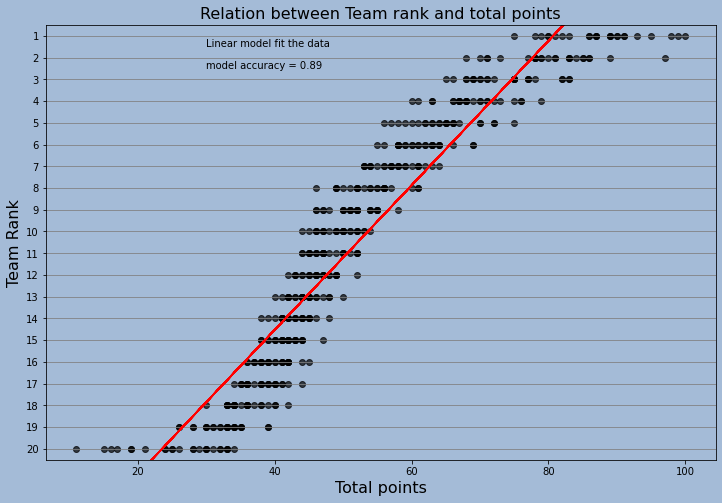

In [22]:
fig, ax = plt.subplots (figsize = (12, 8))
fig.set_facecolor('#A4BBD7')
ax.patch.set_facecolor ('#A4BBD7')

# plot data
plt.scatter(X_points,y, alpha = 0.7, color = 'black')
plt.plot(X_points,y_preds_points, color = 'red')

# horizontal grid
plt.grid(axis = 'y', color = 'grey' )

# prepare and invert y-axis 
plt.yticks ([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.ylim(0.5,20.5)
plt.gca().invert_yaxis()

# axis and plot titles
plt.xlabel('Total points', fontsize = 16, color = 'black')
plt.ylabel('Team Rank', fontsize = 16, color = 'black')
plt.title('Relation between Team rank and total points', fontsize = 16, color = 'black')
ax.annotate(text = 'Linear model fit the data', xy  = (30, 1.5))
ax.annotate(text = f'model accuracy = {round(r_sq_points,2)}', xy  = (30, 2.5))
plt.savefig('Team rank prediction using Total points.jpeg');